In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
employees = pd.read_csv("HR_comma_sep.csv")

In [4]:
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
employees["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
employees = employees.rename(columns={'sales': 'department'})

In [8]:
employees.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

## 1 missing values

In [8]:
employees.isnull().sum()  #There are no missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [16]:
numcols = employees[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']]

## 2.1 Heatmap

<Axes: >

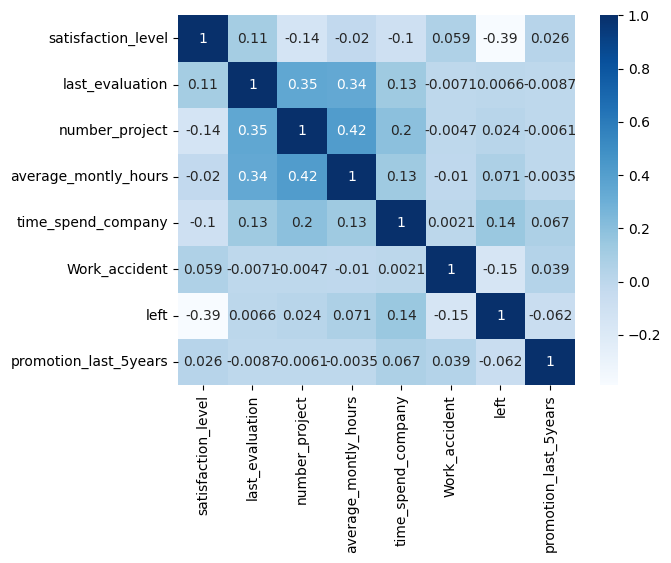

In [10]:
sns.heatmap(numcols.corr(), annot=True, cmap = "Blues")

#### We can see from the heatmap that there is very less or weak correaltion between the variables as the correalation between number of projects an employee involved in and average monthly hours which is the highest is also less than 0.5  

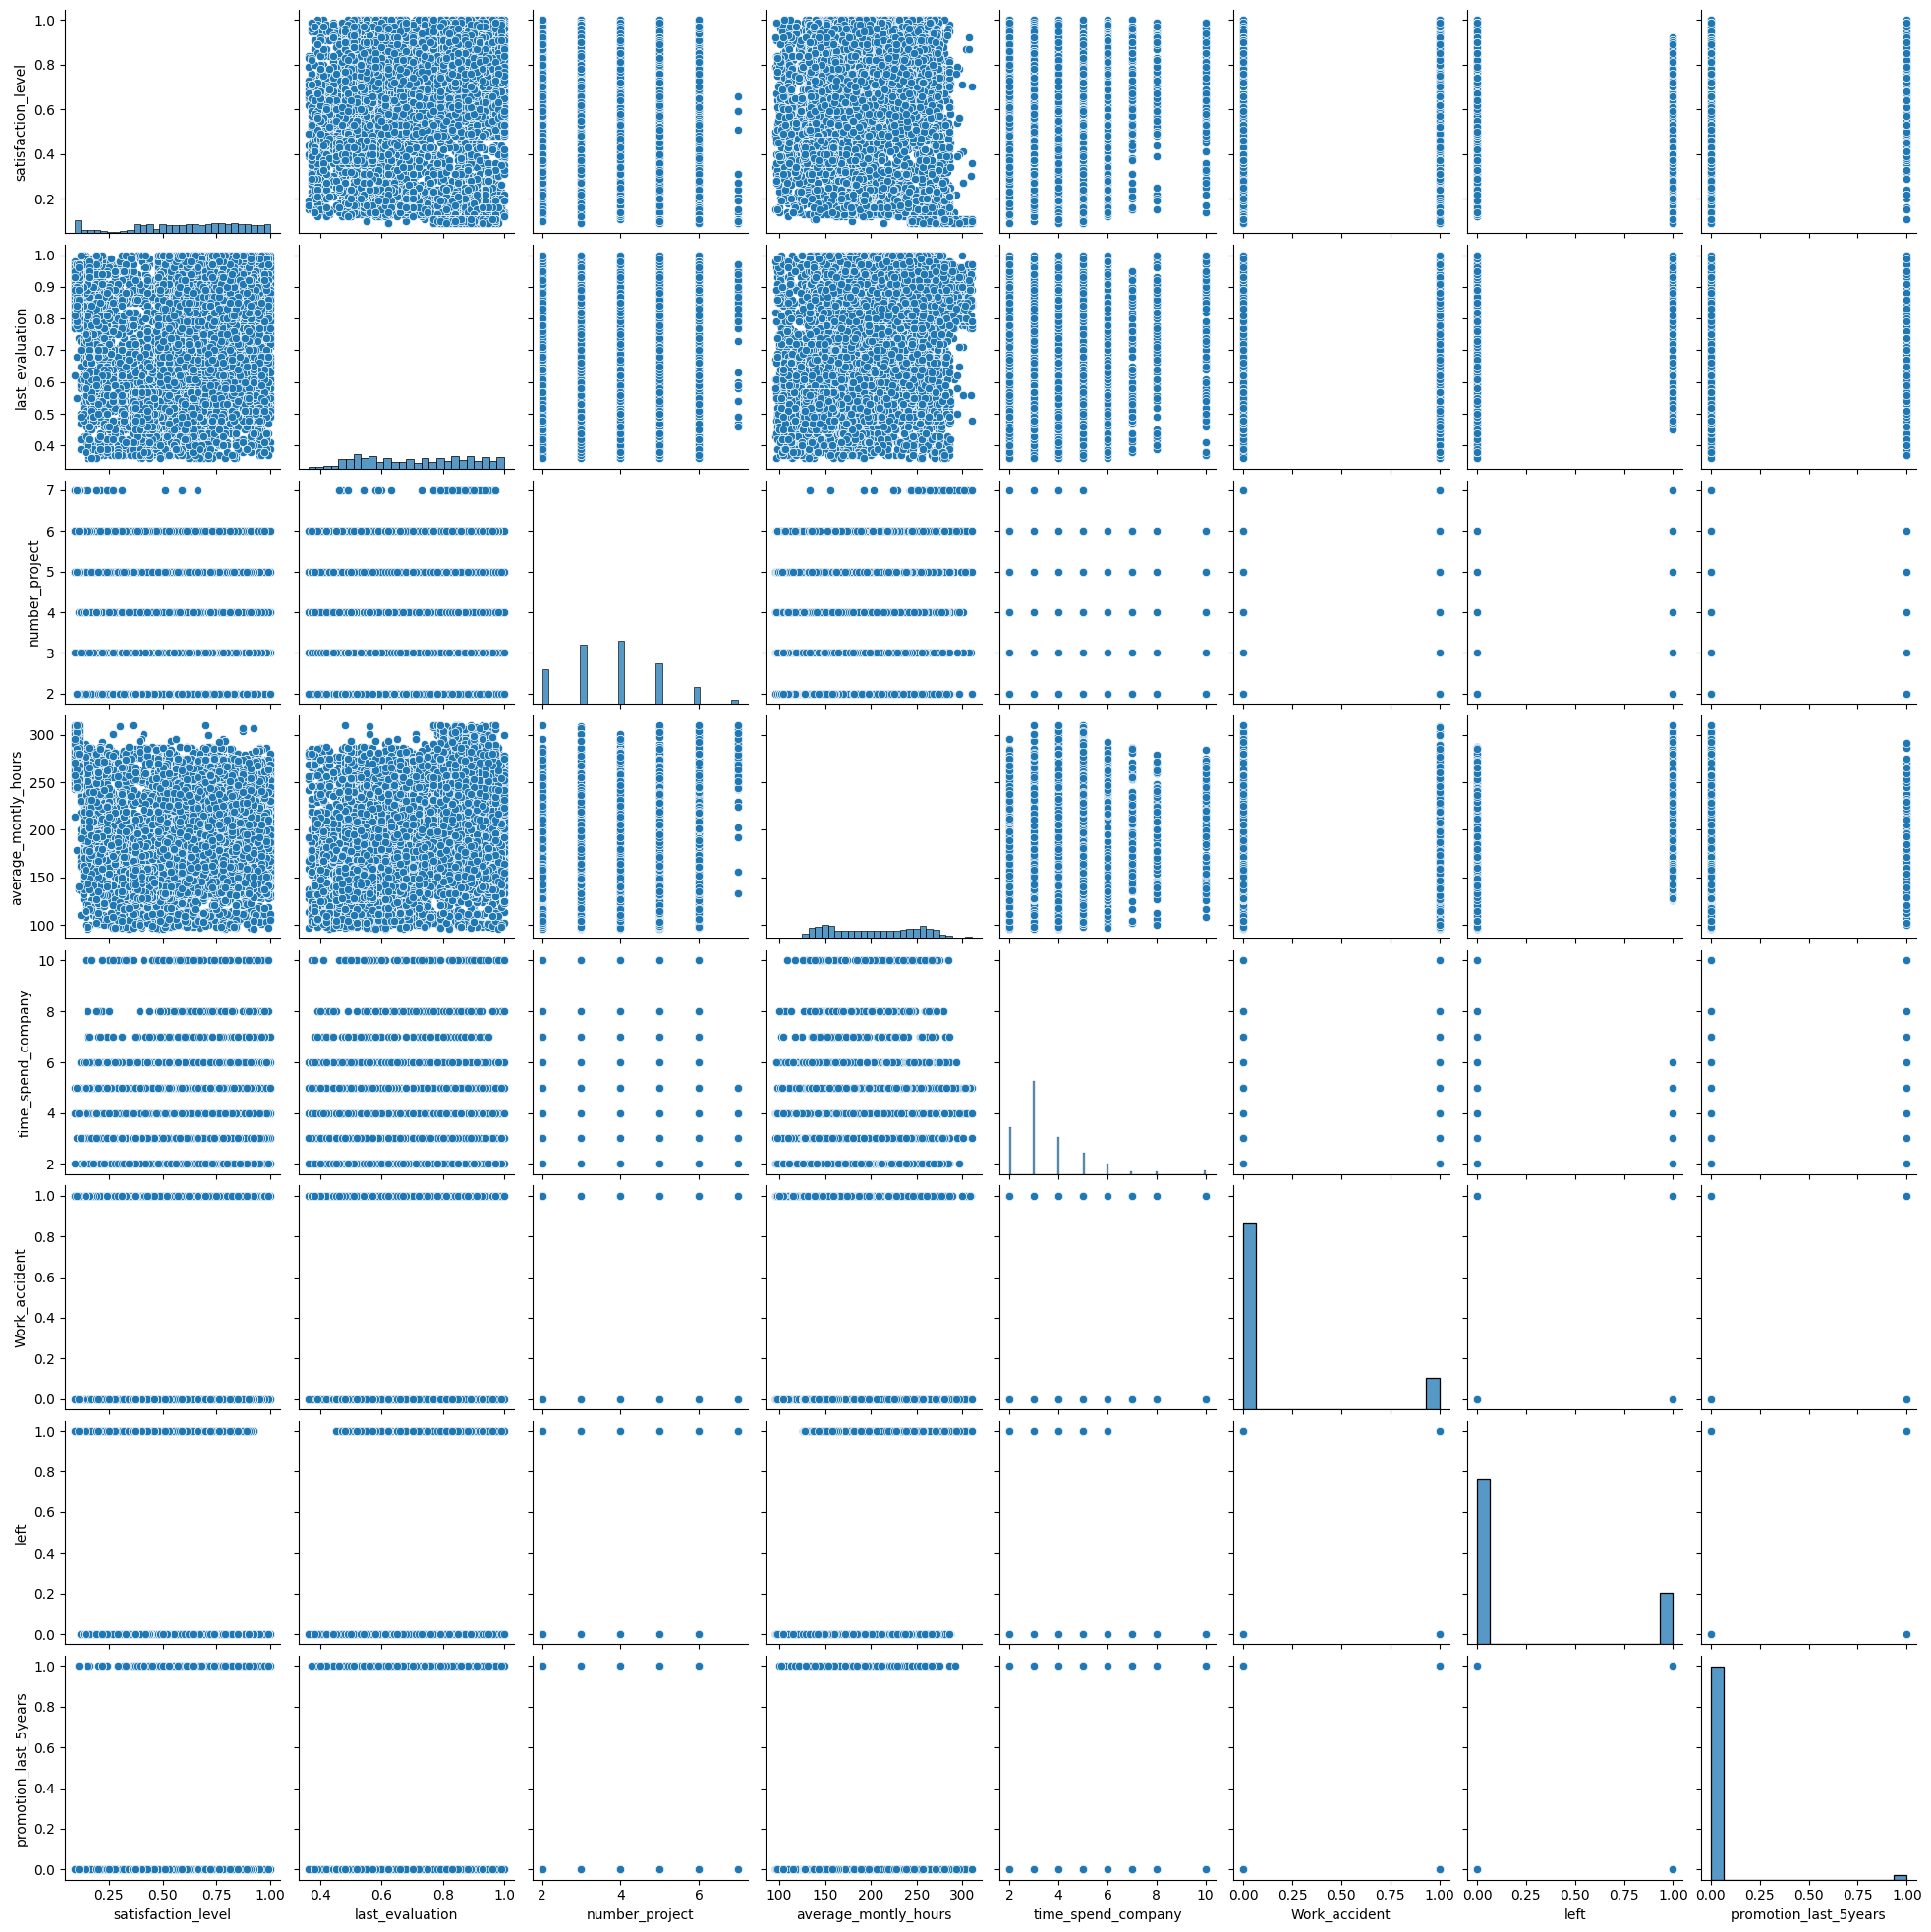

In [11]:
#sns.pairplot(numcols)
#plt.show()

#Here too we can see from the scatterplots that there is no correlation between the variables

## 2.2 Distribution Plots

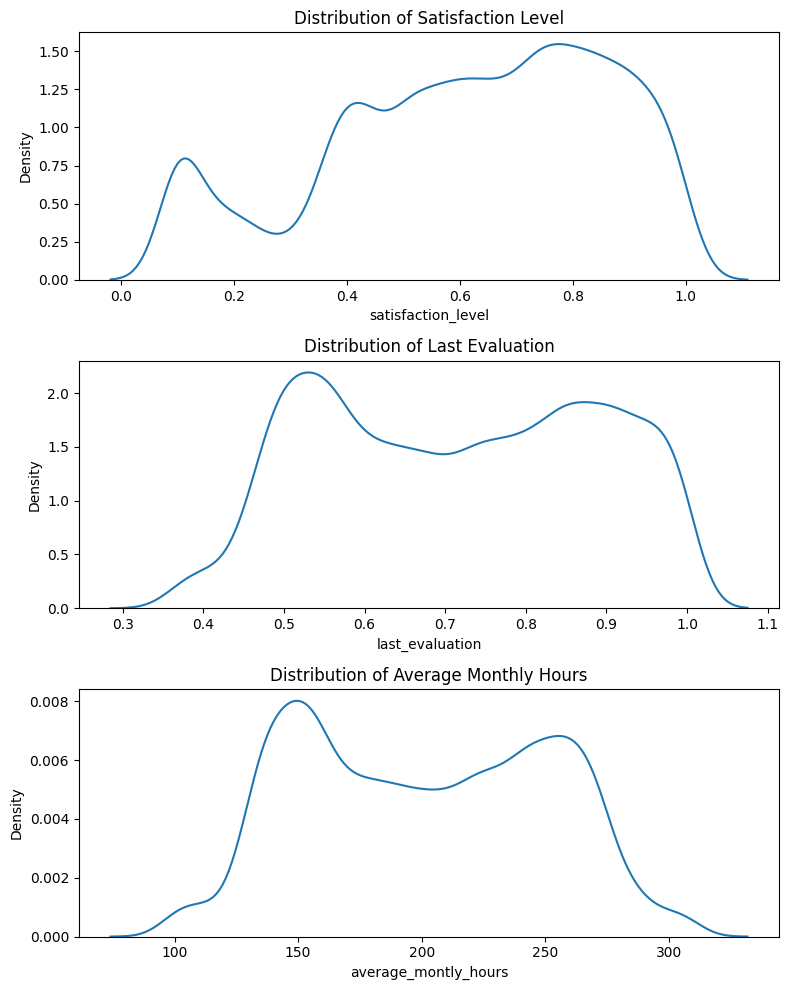

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

sns.kdeplot(employees['satisfaction_level'], ax=axes[0])
axes[0].set_title('Distribution of Satisfaction Level')

sns.kdeplot(employees['last_evaluation'], ax=axes[1])
axes[1].set_title('Distribution of Last Evaluation')

sns.kdeplot(employees['average_montly_hours'], ax=axes[2])
axes[2].set_title('Distribution of Average Monthly Hours')

plt.tight_layout()
plt.show()


## 2.3 Bar plot

<Axes: xlabel='number_project', ylabel='count'>

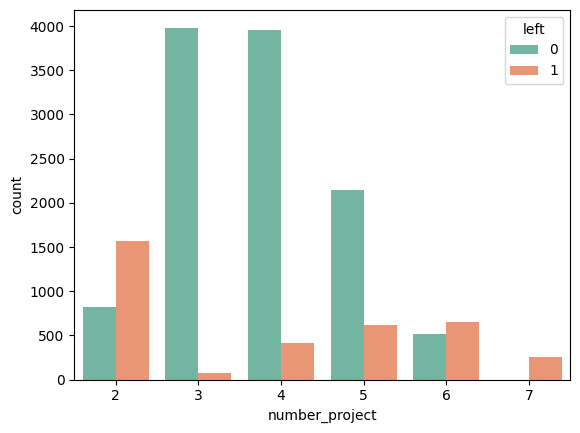

In [17]:
sns.countplot(data=employees, x='number_project', hue='left', palette='Set2')

### From the above bar graph, we can say that 3 to 5 projects is the sweetspot where employees do not leave in most cases and we can observe that any number of projects above or below this range has a higher turnover than retention.
### The highest turnover is at 2 projects and one more interesting observation is that at 7 projects there all the employees have left likely due to heavy workload.
### In conclusion, we can say that overworked and underutilized employees show high turnover where are employees that are involved in 3 to 5 projects show significantly high retention compared to the turnover. 

In [9]:
left_employees = employees[employees['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [10]:
from sklearn.cluster import KMeans 

In [12]:
km = KMeans(n_clusters = 3, random_state = 42)
left_employees['cluster'] = km.fit_predict(left_employees)

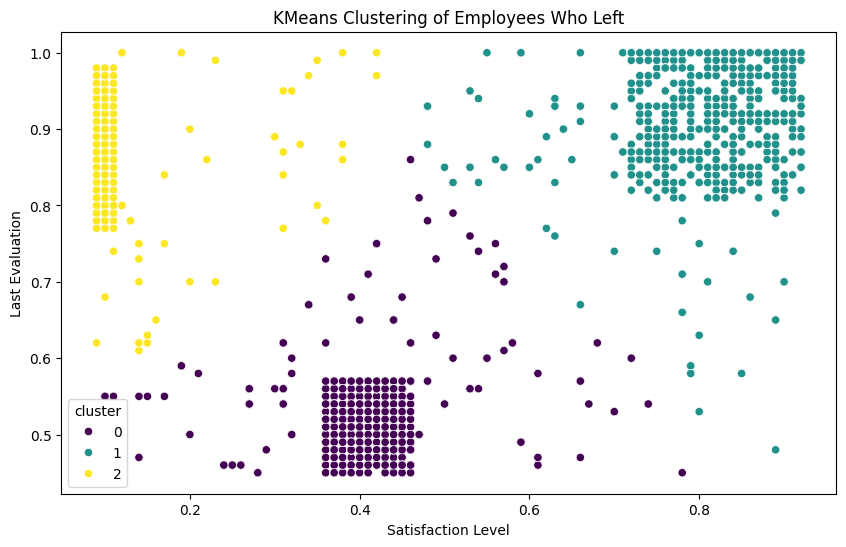

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=left_employees, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='viridis')
plt.title('KMeans Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

### We can see well separated clusters here
### Cluster 0 - people with low satisfaction ~0.2-0.5 and mid level evaluations 0.5-0.7. These employees are undersatisfed yet moderately evaluated.
### Cluster 1 - people with high satisfaction ~0.6-1 and are highly evaluated >0.8. These employees maybe leaving due to external offers or looking for better opportunities despite being highly evaluated and satisfied
### Cluster 2 - people with very low satisfaction <0.3 but high evaluations >0.75. This is the group that the company needs to focus on retaining as they are talented yet unhappy employees.

In [18]:
objcols = employees[['department', 'salary']]

In [19]:
numcols = numcols.drop('left', axis=1)

In [28]:
objcols_encoded = pd.get_dummies(objcols, drop_first=True).astype(int)

In [29]:
x = pd.concat([numcols, objcols_encoded], axis=1)
y = employees['left']

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=123
)

In [34]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(random_state=123)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [38]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: left
0    9142
1    2857
Name: count, dtype: int64
After SMOTE: left
0    9142
1    9142
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [45]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
y_pred_log = cross_val_predict(log_model, x_train_sm, y_train_sm, cv=5)

print("Logistic Regression - Classification Report")
print(classification_report(y_train_sm, y_pred_log))

rf_model = RandomForestClassifier(random_state=42)
y_pred_rf = cross_val_predict(rf_model, x_train_sm, y_train_sm, cv=5)

print("Random Forest - Classification Report")
print(classification_report(y_train_sm, y_pred_rf))

gb_model = GradientBoostingClassifier(random_state=42)
y_pred_gb = cross_val_predict(gb_model, x_train_sm, y_train_sm, cv=5)

print("Gradient Boosting - Classification Report")
print(classification_report(y_train_sm, y_pred_gb))

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      9142
           1       0.77      0.81      0.79      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9142
           1       0.99      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284

Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9142
           1       0.97      0.94      0.96      9142

    accuracy                           0.96     18284
   m

In [46]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

#Log_reg
log_model.fit(x_train_sm, y_train_sm)
y_prob_log = log_model.predict_proba(x_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log) # We don't need threshold. Therefore use of _
roc_auc_log = auc(fpr_log, tpr_log)

#Rondom_Forest
rf_model.fit(x_train_sm, y_train_sm)
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Gradient_Boosting
gb_model.fit(x_train_sm, y_train_sm)
y_prob_gb = gb_model.predict_proba(x_test)[:, 1]

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

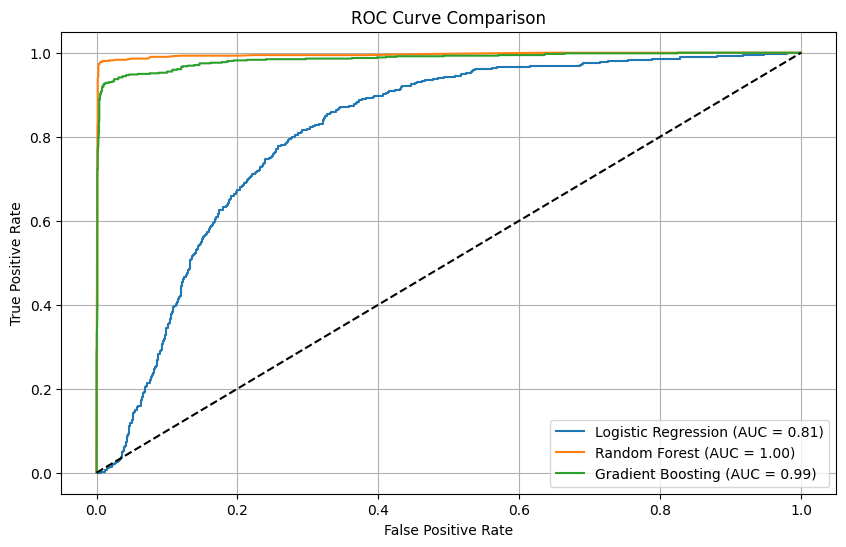

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

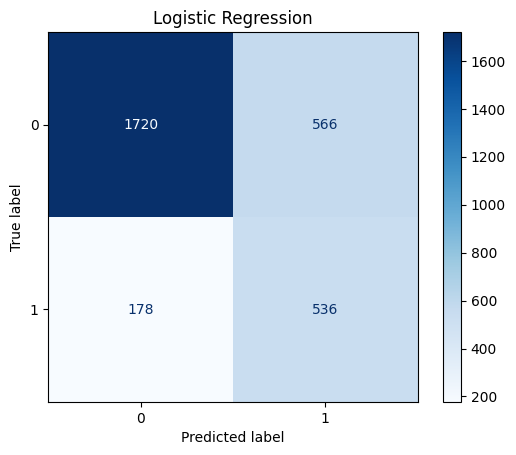

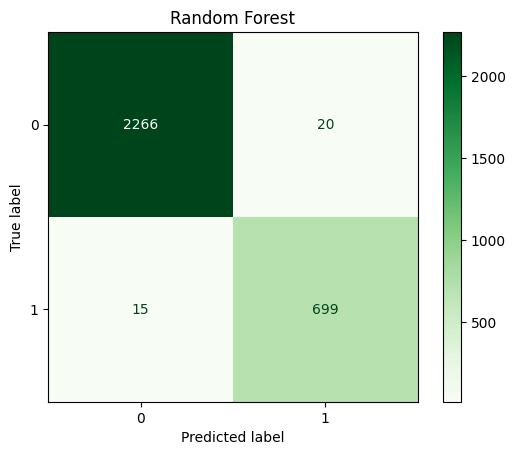

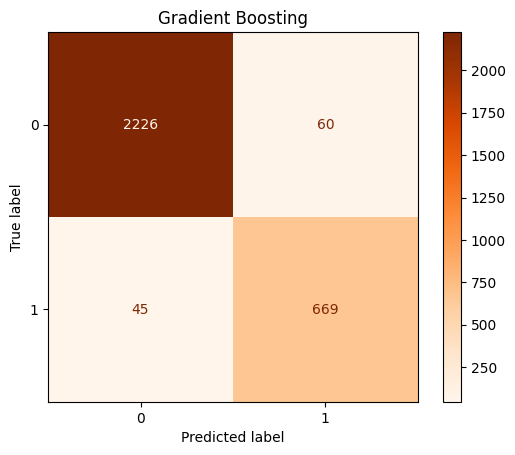

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, x_test, y_test, cmap='Blues')
plt.title("Logistic Regression")
plt.show()

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap='Greens')
plt.title("Random Forest")
plt.show()

# Gradient Boosting
ConfusionMatrixDisplay.from_estimator(gb_model, x_test, y_test, cmap='Oranges')
plt.title("Gradient Boosting")
plt.show()

### In employee turnover prediction, we care more about Recall (of class 1 — employees who leave)

### Why? Because it's better to catch more people who might leave, even if we have a few false alarms.

### If recall is low, we will miss employees who are likely to leave — which defeats the purpose of retention strategies. Therefore, we must focus on Recall.

In [50]:
# Predict probability of class 1 (employee leaving)
y_prob = rf_model.predict_proba(x_test)[:, 1]

In [51]:
import pandas as pd
result_df = pd.DataFrame({
    'probability': y_prob,
    'actual': y_test.reset_index(drop=True)
})

In [52]:
def assign_zone(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

result_df['zone'] = result_df['probability'].apply(assign_zone)

In [53]:
zone_counts = result_df['zone'].value_counts()
print(zone_counts)

zone
Safe Zone (Green)            2147
High-Risk Zone (Red)          650
Low-Risk Zone (Yellow)        139
Medium-Risk Zone (Orange)      64
Name: count, dtype: int64


## Retention Strategy Suggestions by Zone:

### Safe Zone (<20%) - Very low risk of leaving - Keep these employees engaged, offer regular feedback and career development opportunities.
### Low-Risk Zone (20–60%) - Moderate risk - Start proactive engagement — conduct check-ins, ensure fair workloads, assess satisfaction.
### Medium-Risk Zone (60–90%) - High risk - Targeted retention efforts — offer training, rewards, career growth, or manager review.
### High-Risk Zone (>90%) - Extremely likely to leave - Critical: One-on-one discussions, possible role or team change, promotions, salary reviews.